In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [20]:
df = pd.read_csv(r"C:\Users\mouha\Desktop\PROJECT\projet_kmeans\Live_20210128.csv")
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [22]:
df_clean = df.drop(
    columns=["status_id", "status_published", 
             "Column1", "Column2", "Column3", "Column4"]
)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [23]:
df_clean = pd.get_dummies(df_clean, columns=["status_type"], drop_first=True)

df_clean.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,False,False,True
1,150,0,0,150,0,0,0,0,0,True,False,False
2,227,236,57,204,21,1,1,0,0,False,False,True
3,111,0,0,111,0,0,0,0,0,True,False,False
4,213,0,0,204,9,0,0,0,0,True,False,False


In [15]:
# Before (removed all data):
df = df.dropna()  # This removed all 7050 rows

# After (keeps meaningful data):
useful_columns = ['status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df = df[useful_columns]  # Keep only useful columns
df = df.dropna()  # Now safe to drop any remaining NaN values

In [24]:
df_clean.isnull().sum()


num_reactions         0
num_comments          0
num_shares            0
num_likes             0
num_loves             0
num_wows              0
num_hahas             0
num_sads              0
num_angrys            0
status_type_photo     0
status_type_status    0
status_type_video     0
dtype: int64

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)


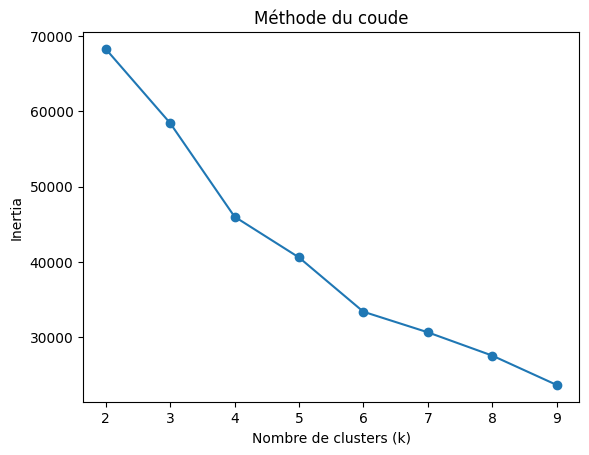

In [26]:
inertia = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia")
plt.title("Méthode du coude")
plt.show()


In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_clean["cluster"] = clusters


In [28]:
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score :", sil_score)


Silhouette Score : 0.5538469592084265


In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_clean["PCA1"] = X_pca[:, 0]
df_clean["PCA2"] = X_pca[:, 1]


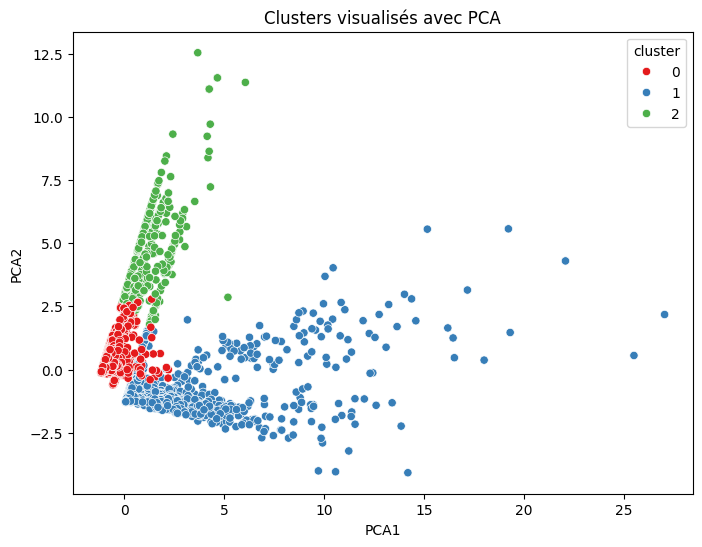

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="cluster",
    data=df_clean,
    palette="Set1"
)
plt.title("Clusters visualisés avec PCA")
plt.show()


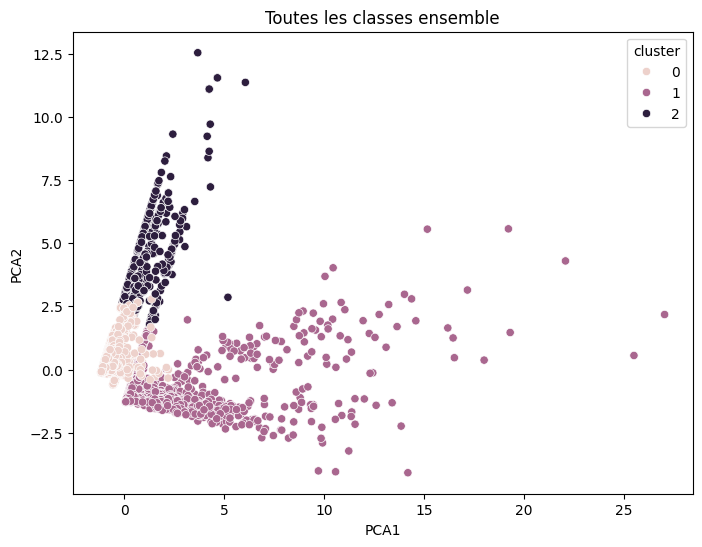

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="cluster",
    data=df_clean
)
plt.title("Toutes les classes ensemble")
plt.show()


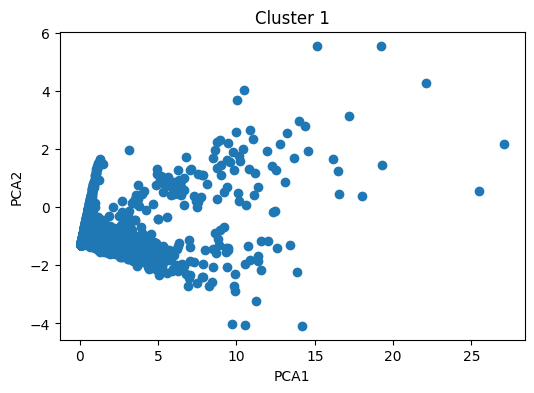

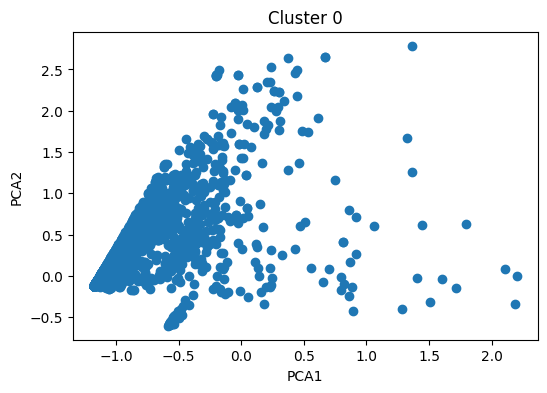

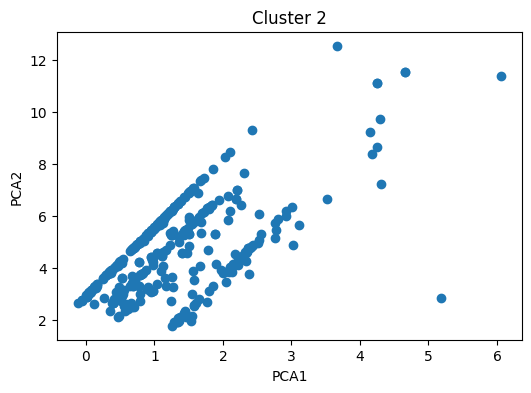

In [32]:
for c in df_clean["cluster"].unique():
    plt.figure(figsize=(6,4))
    subset = df_clean[df_clean["cluster"] == c]
    plt.scatter(subset["PCA1"], subset["PCA2"])
    plt.title(f"Cluster {c}")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.show()


In [33]:
df_clean[["num_likes", "num_comments", "num_shares", "cluster"]].head(10)


,num_likes,num_comments,num_shares,cluster
0,432,512,262,1
1,150,0,0,0
2,204,236,57,1
3,111,0,0,0
4,204,0,0,0
5,211,6,0,0
6,418,614,72,1
7,260,453,53,1
8,198,1,0,0
9,167,9,1,0


In [34]:
cluster_0 = df_clean[df_clean["cluster"] == 0]
cluster_1 = df_clean[df_clean["cluster"] == 1]
cluster_2 = df_clean[df_clean["cluster"] == 2]

cluster_2.head()  # exemple : individus du cluster 2


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,cluster,PCA1,PCA2
166,4410,633,257,4315,73,17,5,0,0,True,False,False,2,6.055261,11.357594
355,1186,37,1,1161,19,6,0,0,0,True,False,False,2,0.435647,3.079384
361,1043,117,24,984,58,1,0,0,0,False,True,False,2,1.249054,2.717149
726,1542,18,1260,1520,12,6,0,4,0,True,False,False,2,5.182553,2.858875
1010,1052,12,7,1052,0,0,0,0,0,False,True,False,2,0.520222,2.936888


In [35]:
df_clean.groupby("cluster").mean()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,PCA1,PCA2
cluster,,,,,,,,,,,,,,
0,93.225432,11.809372,1.762739,91.143767,1.248635,0.543449,0.137170,0.125341,0.024113,0.925159,0.063694,0.000000,-0.967922,0.128106
1,234.571867,660.478528,117.918054,192.956617,36.410167,2.538124,1.857581,0.504382,0.302366,0.005697,0.000000,0.994303,1.659782,-0.996758
2,1820.467742,60.709677,14.303763,1814.674731,3.118280,2.443548,0.182796,0.043011,0.005376,0.559140,0.228495,0.174731,1.256358,4.600666
